    Exploring the Data

In [1]:
import pandas as pd 
import numpy as np
import json
import seaborn as sb 
from sklearn import linear_model 
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

In [2]:
df = pd.read_json('data/train.json')
df.head()
len(df)

49352

Number of training rows = 49532 

In [3]:
print 'Number of unique created cols = ' , len(df['created'].unique())

Number of unique created cols =  48675


In [4]:
print df.columns 

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')


In [5]:
print 'max price = ' , np.max(df['price'])
print 'min price = ' , np.min(df['price'])

df['price'].describe()

max price =  4490000
min price =  43


count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

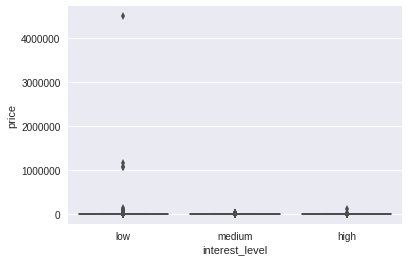

In [6]:
sb.boxplot(x="interest_level", y="price", data=df, order = ['low', 'medium', 'high'])

In [7]:
df = df[df['price'] <= 60000]
# Removing the outliers in the prices 

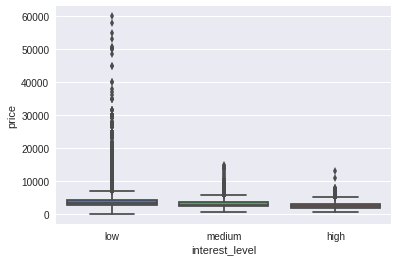

In [8]:
sb.boxplot(x="interest_level", y="price", data=df, order = ['low', 'medium', 'high'])

In [9]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


## Drop columns : created, description, features, building id, photos, 
## Split train test into 80/20 
## Drop rows that have prices with low interest above 60k (outliers)

In [10]:
df_new = df.drop(['photos', 'created', 'description', 'features', 'building_id', 'listing_id'], axis = 1)

In [11]:
df_new.head()

,bathrooms,bedrooms,display_address,interest_level,latitude,longitude,manager_id,price,street_address
10,1.5,3,Metropolitan Avenue,medium,40.7145,-73.9425,5ba989232d0489da1b5f2c45f6688adc,3000,792 Metropolitan Avenue
10000,1.0,2,Columbus Avenue,low,40.7947,-73.9667,7533621a882f71e25173b27e3139d83d,5465,808 Columbus Avenue
100004,1.0,1,W 13 Street,high,40.7388,-74.0018,d9039c43983f6e564b1482b273bd7b01,2850,241 W 13 Street
100007,1.0,1,East 49th Street,low,40.7539,-73.9677,1067e078446a7897d2da493d2f741316,3275,333 East 49th Street
100013,1.0,4,West 143rd Street,low,40.8241,-73.9493,98e13ad4b495b9613cef886d79a6291f,3350,500 West 143rd Street


In [12]:
(df_new['price']).dtype

dtype('int64')

## Select columns with only int: bathroom, bedrooms, latitude, long, price 
## Split train test into 80/20 
## Drop rows that have prices with low interest above 60k (outliers)

In [13]:
def modify_labels(label):
    if label == 'low':
        return 1
    elif label == 'medium':
        return 2
    else:
        return 3

In [14]:
#Only int 
df_new = df[['bathrooms', 'bedrooms', 'interest_level', 'latitude', 'longitude']]
df_new['interest_level'] = df_new['interest_level'].apply(modify_labels)
df_new.head()

/home/yewwah-ubuntu/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,bathrooms,bedrooms,interest_level,latitude,longitude
10,1.5,3,2,40.7145,-73.9425
10000,1.0,2,1,40.7947,-73.9667
100004,1.0,1,3,40.7388,-74.0018
100007,1.0,1,1,40.7539,-73.9677
100013,1.0,4,1,40.8241,-73.9493


In [15]:
df_new_target = df_new['interest_level']
df_new = df_new.drop(['interest_level'], axis = 1)
df_new.head()

,bathrooms,bedrooms,latitude,longitude
10,1.5,3,40.7145,-73.9425
10000,1.0,2,40.7947,-73.9667
100004,1.0,1,40.7388,-74.0018
100007,1.0,1,40.7539,-73.9677
100013,1.0,4,40.8241,-73.9493


In [16]:
skf = StratifiedKFold(n_splits=3)

In [17]:
df_new.dtypes

bathrooms    float64
bedrooms       int64
latitude     float64
longitude    float64
dtype: object

In [ ]:
for train, test in skf.split(df_new, df_new_target):
    regr = linear_model.LinearRegression()
    new = train[:5]
    regr.fit(df_new.iloc[new], df_new_target.iloc[new])
    #print 'haha'
    #print 'Coefficients: \n', regr.coef_
    # The mean squared error
    #print "Mean squared error: %.2f" % np.mean((regr.predict(df_new[test]) - df_new_target[test]) ** 2)
    # Explained variance score: 1 is perfect prediction
    #print 'Variance score: %.2f' % regr.score(df_new[test], df_new_target[test])